## Ajuste Bouger y término de color

<pre>Máster en Astrofísica UCM  -- Técnicas Experimentales en Astrofísica
Jaime Zamorano and Nicolás Cardiel

Datos de campaña JKT 1999 Tesis Pablo Pérez González

v1  2021/12/11  J. Zamorano almost ready for 2020/21 
</pre>

In [2]:
#!/usr/bin/env python
import matplotlib
from pylab import *
import numpy as np
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import integrate,interpolate,stats
import matplotlib.mlab as ml
from math import pi  
from matplotlib.pyplot import figure, show, rc, grid, savefig
from astropy.io import ascii

In [3]:
mpl.rcParams['text.usetex']=False
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']
rcParams['font.size'] = 15.
rcParams['lines.linewidth'] = 4.
rcParams['axes.labelsize'] = 'large'
rcParams['grid.linewidth'] = 1.0
rcParams['grid.linestyle'] = ':'

### Datos observacionales 
Son observaciones con el telescopio JKT (La Palma) pertenecientea a la tesis de Pablo Pérez González obtenidos en Julio de 1999. Usaremos sus ficheros que contienen las medidas de las estrellas estándar. 

Leemos el fichero csv ('comma separated values') correspondiente a la primera noche de observación como una tabla de astropy. 

Nota: El flujo f en la columna 2.5logf está en unidades de cuentas/s 

In [4]:
directory = "./files/fotometria_1/"
file_N1 = directory+"JKT99_N1_refer_stars_b.csv"
data1 = ascii.read(file_N1, format='basic', delimiter=';', guess=False)

In [5]:
print(data1)    # cada columna es una variable

IMA     star     t    secz 2.5logf   V     B-V   Errorm  V-R  
--- ----------- ---- ----- ------- ------ ------ ------ ------
579     113-492 20.0 1.223   9.779 12.174  0.553  0.003  0.342
579     113-493 20.0 1.223   9.978 11.767  0.786  0.003   0.43
579     113-495 20.0 1.223   9.167 12.437  0.947  0.004  0.512
583  PG2331+055 90.0 1.086    7.44 15.182 -0.066  0.005 -0.012
583 PG2331+055A 90.0 1.086   8.813 13.051  0.741  0.003  0.419
583 PG2331+055B 90.0 1.086   7.062 14.744  0.819  0.007  0.481
586    111-1965 20.0 2.333   8.885 11.419   1.71  0.009  0.951
586    111-1969 20.0 2.333   9.728 10.382  1.959  0.006  1.177
587      MARK-A 60.0 1.931    9.04 13.258 -0.242  0.006 -0.115
587     MARK-A1 60.0 1.931   5.714 15.911  0.609  0.049  0.367
587     MARK-A2 60.0 1.931    6.96  14.54  0.666  0.021  0.379
587     MARK-A3 60.0 1.931   6.441 14.818  0.938  0.028  0.587
590  PG2336+004 20.0 1.134    6.83 15.899 -0.172  0.041 -0.061
590 PG2336+004A 20.0 1.134  10.607 11.277  0.679  0.005

In [6]:
# podemos referirnos a ella por su nombre que es el que aparece en el encabezado
print(data1['secz'][0:4])  

 secz
-----
1.223
1.223
1.223
1.086


### Preparando la gráfica para ajustar la Recta de Bouguer

La ecuación simple de la fotometría
\begin{equation*}
m_B + 2.5 log(F_B)  =  C - K_B X  
\end{equation*}

In [7]:
data1['B'] = np.add(data1['V'],data1['B-V'])               # para la mgnitud B estándar
data1['B+2.5logF'] = np.add(data1['B'],data1['2.5logf'])   # para el eje Y de la gráfica

In [8]:
print(data1[0:6])

IMA     star     t    secz ... Errorm  V-R           B          B+2.5logF
--- ----------- ---- ----- ... ------ ------ ------------------ ---------
579     113-492 20.0 1.223 ...  0.003  0.342             12.727    22.506
579     113-493 20.0 1.223 ...  0.003   0.43 12.552999999999999    22.531
579     113-495 20.0 1.223 ...  0.004  0.512 13.383999999999999    22.551
583  PG2331+055 90.0 1.086 ...  0.005 -0.012             15.116    22.556
583 PG2331+055A 90.0 1.086 ...  0.003  0.419             13.792    22.605
583 PG2331+055B 90.0 1.086 ...  0.007  0.481 15.562999999999999    22.625


Text(0.5, 1.0, 'Gráfica para la noche 1')

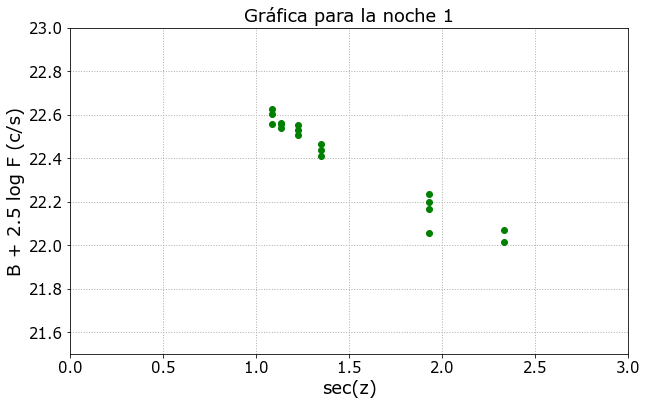

In [9]:
figura = plt.figure(figsize=(10,6))
ax0 = plt.subplot(1,1,1)
xx = np.linspace(0.0,5,30)
plt.plot(data1['secz'],data1['B+2.5logF'],'go')
plt.xlim(0.0,3.0)
plt.ylim(21.5,23.0)
plt.grid()
plt.xlabel('sec(z)')
plt.ylabel('B + 2.5 log F (c/s)')
plt.title('Gráfica para la noche 1')


Se aprecia que los puntos se alinean como era de esperar.
Podemos ajustar una recta.

### Ajuste de la recta de Bouguer

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data1['secz'],data1['B+2.5logF'])
print("slope, intercept, r_value, p_value, std_err")
print("%.3f  %.3f %.3f  %.3f %.3f" % (slope, intercept, r_value, p_value, std_err))

slope, intercept, r_value, p_value, std_err
-0.461  23.079 -0.978  0.000 0.025


In [11]:
(m_x1,b_x1) = polyfit(data1['secz'],data1['B+2.5logF'],1)
xx = np.linspace(0.0,5,30)
ynew = polyval([m_x1,b_x1],xx)
print("%.3f  %.3f" % (m_x1,b_x1))

-0.461  23.079


La pendiente es negativa. El coeficiente de extinción $K_B$ = 0.461 es positivo.

Text(0.05, 0.05, 'B + 2.5 log F = 23.079  -0.461 sec(z) ')

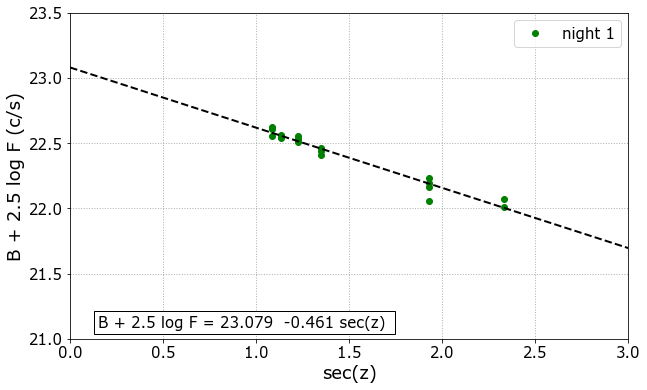

In [12]:
figura = plt.figure(figsize=(10,6))
ax0 = plt.subplot(1,1,1)
plt.plot(data1['secz'],data1['B+2.5logF'],'go',label='night 1')
plt.xlim(0.0,3.0)
plt.ylim(21.0,23.5)
plt.grid()
plt.xlabel('sec(z)')
plt.ylabel('B + 2.5 log F (c/s)')
plt.plot(xx,ynew,'k--',lw=2)
plt.legend()
ax0.text(0.05, 0.05,"B + 2.5 log F = %.3f  %.3f sec(z) "%(b_x1,m_x1), ha='left', va='center', transform=ax0.transAxes,fontsize=15,bbox=dict(facecolor='white'))

Hacemos la misma operación para otras noches de la misma campaña

In [25]:
file_N2 = directory+"JKT99_N2_refer_stars_b.csv"
data2 = ascii.read(file_N2, format='basic', delimiter=';', guess=False)
file_N6 = directory+"JKT99_N6_refer_stars_b.csv"
data6 = ascii.read(file_N6, format='basic', delimiter=';', guess=False)
file_N7 = directory+"JKT99_N7_refer_stars_b.csv"
data7 = ascii.read(file_N7, format='basic', delimiter=';', guess=False)

In [26]:
data2['B']         = np.add(data2['V'],data2['B-V']) 
data2['B+2.5logF'] = np.add(data2['B'],data2['2.5logf']) 
data6['B']         = np.add(data6['V'],data6['B-V']) 
data6['B+2.5logF'] = np.add(data6['B'],data6['2.5logf']) 
data7['B']         = np.add(data7['V'],data7['B-V']) 
data7['B+2.5logF'] = np.add(data7['B'],data7['2.5logf']) 

In [27]:
print('Night 1',"%.3f  %.3f" % (m_x1,b_x1))

(m_x2,b_x2) = polyfit(data2['secz'],data2['B+2.5logF'],1)
ynew2 = polyval([m_x2,b_x2],xx)
print('Night 2',"%.3f  %.3f" % (m_x2,b_x2))

x = [x for x,y in zip(data6['secz'],data6['B+2.5logF']) if x<1.8]
y = [y for x,y in zip(data6['secz'],data6['B+2.5logF']) if x<1.8]
#(m_x6,b_x6) = polyfit(data6['secz'],data6['B+2.5logF'],1)
(m_x6,b_x6) = polyfit(x,y,1)
xx = np.linspace(0.0,5,30)
ynew6 = polyval([m_x6,b_x6],xx)
print('Night 6',"%.3f  %.3f" % (m_x6,b_x6))
(m_x7,b_x7) = polyfit(data7['secz'],data7['B+2.5logF'],1)
ynew7 = polyval([m_x7,b_x7],xx)
print('Night 7',"%.3f  %.3f" % (m_x7,b_x7))

Night 1 -0.461  23.079
Night 2 -0.082  22.658
Night 6 -0.258  22.906
Night 7 -0.347  23.033


Text(0.05, 0.05, 'Night 7   B + 2.5 log F = 23.033  -0.347 sec(z) ')

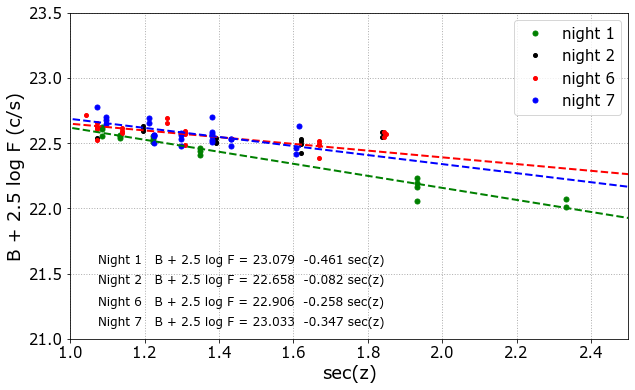

In [28]:
figura = plt.figure(figsize=(10,6))
ax0 = plt.subplot(1,1,1)
plt.plot(data1['secz'],data1['B+2.5logF'],'go',label='night 1',ms=5)
plt.plot(data2['secz'],data2['B+2.5logF'],'ko',label='night 2',ms=4)
plt.plot(data6['secz'],data6['B+2.5logF'],'ro',label='night 6',ms=4)
plt.plot(data7['secz'],data7['B+2.5logF'],'bo',label='night 7',ms=5)
plt.plot(xx,ynew,'g--',lw=2)
plt.plot(xx,ynew6,'r--',lw=2)
plt.plot(xx,ynew7,'b--',lw=2)
plt.xlim(1.0,2.5)
plt.ylim(21.0,23.5)
plt.grid()
plt.xlabel('sec(z)')
plt.ylabel('B + 2.5 log F (c/s)')

plt.legend()
ax0.text(0.05, 0.24,"Night 1   B + 2.5 log F = %.3f  %.3f sec(z) "%(b_x1,m_x1), ha='left', va='center', transform=ax0.transAxes,fontsize=12)
ax0.text(0.05, 0.18,"Night 2   B + 2.5 log F = %.3f  %.3f sec(z) "%(b_x2,m_x2), ha='left', va='center', transform=ax0.transAxes,fontsize=12)
ax0.text(0.05, 0.11,"Night 6   B + 2.5 log F = %.3f  %.3f sec(z) "%(b_x6,m_x6), ha='left', va='center', transform=ax0.transAxes,fontsize=12)
ax0.text(0.05, 0.05,"Night 7   B + 2.5 log F = %.3f  %.3f sec(z) "%(b_x7,m_x7), ha='left', va='center', transform=ax0.transAxes,fontsize=12)

Esperamos cambios en el coeficiente de extinción pero no en la constante instrumental.
Para nuestra sorpresa la constante instrumental varía de una noche a otra.

### Término de color
Podemos pintar la gráfica de la noche 7 (por ejemplo) codificando el color de las estrellas para comprobar que los puntos de las estrellas más rojas (mayor índice de color B-V) se separan hacia arriba de la recta ajustada y viceversa. 

Text(0.05, 0.05, 'Night 7   B + 2.5 log F = 23.033  -0.347 sec(z) ')

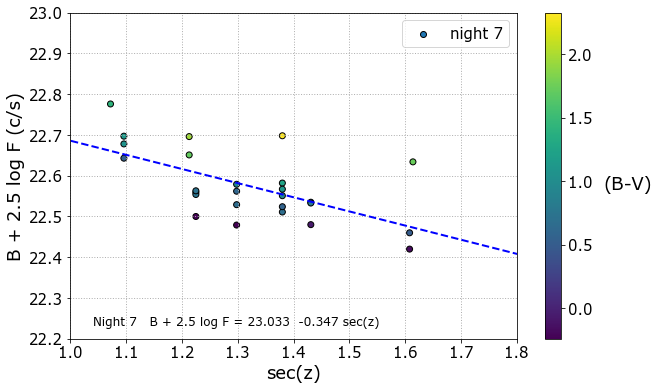

In [29]:
figura = plt.figure(figsize=(10,6))
ax0 = plt.subplot(1,1,1)
plt.scatter(data7['secz'],data7['B+2.5logF'],c=data7['B-V'],label='night 7',edgecolor='black')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 35
cbar.ax.set_ylabel('(B-V)', rotation=0)
plt.plot(xx,ynew7,'b--',lw=2)
plt.xlim(1.0,1.8)
plt.ylim(22.2,23.0)
plt.grid()
plt.xlabel('sec(z)')
plt.ylabel('B + 2.5 log F (c/s)')
plt.legend()
ax0.text(0.05, 0.05,"Night 7   B + 2.5 log F = %.3f  %.3f sec(z) "%(b_x7,m_x7), ha='left', va='center', transform=ax0.transAxes,fontsize=12)


### Ajuste de un término de color

Intentamos ajustar un término de color en la forma
\begin{equation*}
m_B + 2.5 log(F_B)  =  C - K_B X + K_{B-R} (B-R) 
\end{equation*}

In [31]:
data7['B-R'] = np.add(data7['B-V'],data7['V-R'])    # para calcular el B-R de las estrellas 

Text(0.05, 0.05, 'Night 7   B + 2.5 log F = 23.033  -0.347 sec(z) ')

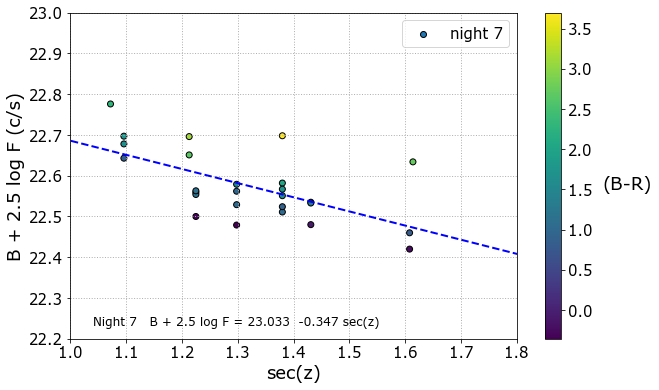

In [32]:
figura = plt.figure(figsize=(10,6))
ax0 = plt.subplot(1,1,1)
plt.scatter(data7['secz'],data7['B+2.5logF'],c=data7['B-R'],label='night 7',edgecolor='black')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 35
cbar.ax.set_ylabel('(B-R)', rotation=0)
plt.plot(xx,ynew7,'b--',lw=2)
plt.xlim(1.0,1.8)
plt.ylim(22.2,23.0)
plt.grid()
plt.xlabel('sec(z)')
plt.ylabel('B + 2.5 log F (c/s)')
plt.legend()
ax0.text(0.05, 0.05,"Night 7   B + 2.5 log F = %.3f  %.3f sec(z) "%(b_x7,m_x7), ha='left', va='center', transform=ax0.transAxes,fontsize=12)

Definimos una función para realizar el ajuste
\begin{equation*}
m_B + 2.5 log(F_B)  =  C - K_B X + K_{B-R} (B-R) 
\end{equation*}

In [33]:
def mifuncion(X , c, k, kbr):
    x,br = X
    return c - k * x + kbr * br

In [34]:
from scipy.optimize import curve_fit
# ajustamos la función
x  = data7['secz']
br = data7['B-R']
y  = data7['B+2.5logF']
# estimaciones de partida C,k,kbr:
p0 = 22., 0.4, 0.01
popt_N7, _ = curve_fit(mifuncion,(x,br),y,p0)

In [35]:
print(popt_N7)     # Cb Kb Kbr

[22.87244796  0.28850385  0.06117848]


In [36]:
print('Night 7',"%.3f  %.3f" % (b_x7,m_x7))
print('Night 7',"%.3f  %.3f %.3f" % (popt_N7[0],popt_N7[1],popt_N7[2]))
termino = np.multiply(popt_N7[2],data7['B-R'])
ynew = np.subtract(data7['B+2.5logF'],termino)

Night 7 23.033  -0.347
Night 7 22.872  0.289 0.061


No handles with labels found to put in legend.


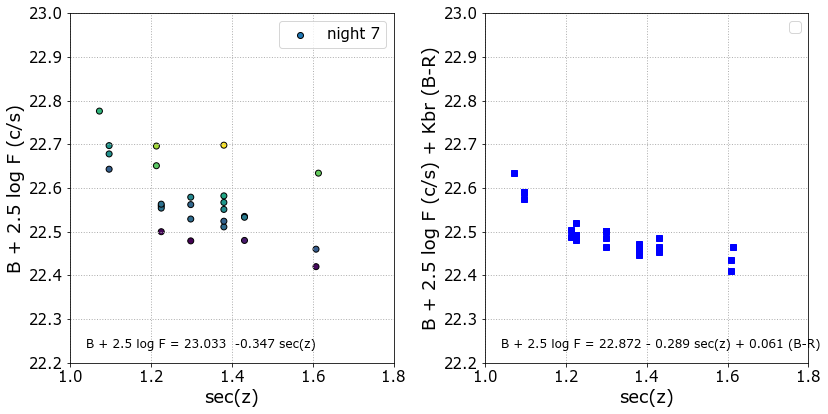

In [37]:
figura = plt.figure(figsize=(12,6))
ax0 = plt.subplot(121)
plt.scatter(x,y,c=data7['B-R'],label='night 7',edgecolor='black')
plt.xlim(1.0,1.8)
plt.ylim(22.2,23.0)
plt.grid()
plt.xlabel('sec(z)')
plt.ylabel('B + 2.5 log F (c/s)')
plt.legend()
ax0.text(0.05, 0.05,"B + 2.5 log F = %.3f  %.3f sec(z) "%(b_x7,m_x7), ha='left', va='center', transform=ax0.transAxes,fontsize=12)

ax1 = plt.subplot(122)
plt.plot(x,ynew,'bs')
plt.xlim(1.0,1.8)
plt.ylim(22.2,23.0)
plt.grid()
plt.xlabel('sec(z)')
plt.ylabel('B + 2.5 log F (c/s) + Kbr (B-R)')
plt.legend()
ax1.text(0.05, 0.05,"B + 2.5 log F = %.3f - %.3f sec(z) + %.3f (B-R)"%(popt_N7[0],popt_N7[1],popt_N7[2]), ha='left', va='center', transform=ax1.transAxes,fontsize=12)
plt.tight_layout()

La dispersión de los puntos azules (los corregidos de término de color) es mucho menor.

In [38]:
data6['B-R'] = np.add(data6['B-V'],data6['V-R'])    # para calcular el B-R de las estrellas 
x  = data6['secz']
br = data6['B-R']
y  = data6['B+2.5logF']
# estimaciones de partida C,k,kbr:
p0 = 22., 0.4, 0.01
popt_N6, _ = curve_fit(mifuncion,(x,br),y,p0)
print(popt_N6)     # Cb Kb Kbr

[22.75426324  0.19730458  0.06112937]


In [39]:
data2['B-R'] = np.add(data2['B-V'],data2['V-R'])    # para calcular el B-R de las estrellas 
x  = data2['secz']
br = data2['B-R']
y  = data2['B+2.5logF']
# estimaciones de partida C,k,kbr:
p0 = 22., 0.4, 0.01
popt_N2, _ = curve_fit(mifuncion,(x,br),y,p0)
print(popt_N2)     # Cb Kb Kbr

[22.77016872  0.2044487   0.05577854]


In [40]:
data1['B-R'] = np.add(data1['B-V'],data1['V-R'])    # para calcular el B-R de las estrellas 
x  = data1['secz']
br = data1['B-R']
y  = data1['B+2.5logF']
# estimaciones de partida C,k,kbr:
p0 = 22., 0.4, 0.01
popt_N1, _ = curve_fit(mifuncion,(x,br),y,p0)
print('Night  ',"C_B    K_B   K_{B-R}")
print('Night 1',"%.3f %.3f %.3f" % (popt_N1[0],popt_N1[1],popt_N1[2]))     # Cb Kb Kbr
print('Night 2',"%.3f %.3f %.3f" % (popt_N2[0],popt_N2[1],popt_N2[2]))     # Cb Kb Kbr
print('Night 6',"%.3f %.3f %.3f" % (popt_N6[0],popt_N6[1],popt_N6[2]))     # Cb Kb Kbr
print('Night 7',"%.3f %.3f %.3f" % (popt_N7[0],popt_N7[1],popt_N7[2]))     # Cb Kb Kbr

Night   C_B    K_B   K_{B-R}
Night 1 23.096 0.506 0.045
Night 2 22.770 0.204 0.056
Night 6 22.754 0.197 0.061
Night 7 22.872 0.289 0.061
